In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
tickers = [
    'AAPL',  # Apple Inc. (Technology)
    'MSFT',  # Microsoft Corporation (Technology)
    'GOOGL', # Alphabet Inc. (Technology)
    'AMZN',  # Amazon.com Inc. (Consumer Discretionary)
    'TSLA',  # Tesla Inc. (Consumer Discretionary)
    'META',    # Meta Platforms Inc. (Communication Services)
    'NFLX',  # Netflix Inc. (Communication Services)
    'NVDA',  # NVIDIA Corporation (Technology)
    'JPM',   # JPMorgan Chase & Co. (Financials)
    'V',     # Visa Inc. (Financials)
    'MA',    # Mastercard Incorporated (Financials)
    'JNJ',   # Johnson & Johnson (Healthcare)
    'UNH',   # UnitedHealth Group Incorporated (Healthcare)
    'PFE',   # Pfizer Inc. (Healthcare)
    'MRK',   # Merck & Co., Inc. (Healthcare)
    'XOM',   # Exxon Mobil Corporation (Energy)
    'CVX',   # Chevron Corporation (Energy)
    'WMT',   # Walmart Inc. (Consumer Staples)
    'KO',    # The Coca-Cola Company (Consumer Staples)
    'PEP',   # PepsiCo Inc. (Consumer Staples)
    'T',     # AT&T Inc. (Telecommunications)
    'VZ',    # Verizon Communications Inc. (Telecommunications)
    'DIS',   # The Walt Disney Company (Communication Services)
    'NKE',   # Nike Inc. (Consumer Discretionary)
    'ADBE',  # Adobe Inc. (Technology)
    'INTC',  # Intel Corporation (Technology)
    'CSCO',  # Cisco Systems Inc. (Technology)
    'BA',    # Boeing Co. (Industrials)
    'CAT',   # Caterpillar Inc. (Industrials)
    'MMM',   # 3M Company (Industrials)
    'MDT',   # Medtronic plc (Healthcare)
    'LMT',   # Lockheed Martin Corporation (Aerospace & Defense)
    'TMO',   # Thermo Fisher Scientific Inc. (Healthcare)
    'AMGN',  # Amgen Inc. (Healthcare)
    'TXN',   # Texas Instruments Incorporated (Technology)
    'QCOM',  # Qualcomm Incorporated (Technology)
    'LRCX',  # Lam Research Corporation (Technology)
    'SBUX',  # Starbucks Corporation (Consumer Discretionary)
    'CHTR',  # Charter Communications Inc. (Communication Services)
    'SPGI',  # S&P Global Inc. (Financials)
    'NOW',   # ServiceNow Inc. (Technology)
    'ZM',    # Zoom Video Communications, Inc. (Communication Services)
    'VRTX',  # Vertex Pharmaceuticals Incorporated (Healthcare)
    'BIIB',  # Biogen Inc. (Healthcare)
    'GILD',  # Gilead Sciences Inc. (Healthcare)
    'NVS',   # Novartis AG (Healthcare)
    'AZN',   # AstraZeneca plc (Healthcare)
    'HSY',   # The Hershey Company (Consumer Staples)
    'MCD',   # McDonald's Corporation (Consumer Discretionary)
    'CPB',   # Campbell Soup Company (Consumer Staples)
    'AMAT',  # Applied Materials, Inc. (Technology)
    'KMB',   # Kimberly-Clark Corporation (Consumer Staples)
]

In [34]:
# Create initial dataframe

start = '2022-09-30'

df = yf.download(tickers,start)

df = df.stack().reset_index()

columns = {column: column.replace(' ', '_').lower() for column in df.columns}

df = df.rename(columns=columns)

df = df.sort_values(['ticker', 'date'])

df = df.reset_index(drop=True)

df

[*********************100%***********************]  52 of 52 completed
/var/folders/5k/s9c0d19s0k7byf19zlnzgmjr0000gn/T/ipykernel_11726/3730181472.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.stack().reset_index()


Price,date,ticker,adj_close,close,high,low,open,volume
0,2022-09-30 00:00:00+00:00,AAPL,136.685547,138.199997,143.100006,138.000000,141.279999,124925300
1,2022-10-03 00:00:00+00:00,AAPL,140.888962,142.449997,143.070007,137.690002,138.210007,114311700
2,2022-10-04 00:00:00+00:00,AAPL,144.498993,146.100006,146.220001,144.259995,145.029999,87830100
3,2022-10-05 00:00:00+00:00,AAPL,144.795685,146.399994,147.380005,143.009995,144.070007,79471000
4,2022-10-06 00:00:00+00:00,AAPL,143.836319,145.429993,147.539993,145.220001,145.809998,68402200
...,...,...,...,...,...,...,...,...
26203,2024-09-26 00:00:00+00:00,ZM,68.900002,68.900002,69.349998,68.129997,68.430000,2018900
26204,2024-09-27 00:00:00+00:00,ZM,69.550003,69.550003,69.589996,68.721001,69.010002,1417500
26205,2024-09-30 00:00:00+00:00,ZM,69.739998,69.739998,70.330002,69.300003,69.480003,2024600
26206,2024-10-01 00:00:00+00:00,ZM,68.639999,68.639999,69.919998,68.209999,69.610001,1930600


In [35]:
# Generate features

df['ret'] = df.groupby('ticker')['adj_close'].pct_change()
df['log_ret'] = np.log(1+df['ret'])

for t in [50,100,150]:
    df[f'ret_{t}'] = df.groupby('ticker')['log_ret'].rolling(t,t).sum().reset_index(drop=True)
    df[f'ret_{t}'] = df.groupby('ticker')[f'ret_{t}'].shift(1)

df = df.dropna().reset_index(drop=True)

df

Price,date,ticker,adj_close,close,high,low,open,volume,ret,log_ret,ret_50,ret_100,ret_150
0,2023-05-09 00:00:00+00:00,AAPL,170.429321,171.770004,173.539993,171.600006,173.050003,45326900,-0.009971,-0.010021,0.167720,0.184493,0.230659
1,2023-05-10 00:00:00+00:00,AAPL,172.205338,173.559998,174.029999,171.899994,173.020004,53724500,0.010421,0.010367,0.149485,0.167712,0.190349
2,2023-05-11 00:00:00+00:00,AAPL,172.393845,173.750000,174.589996,172.169998,173.850006,49514700,0.001095,0.001094,0.163305,0.193737,0.175415
3,2023-05-12 00:00:00+00:00,AAPL,171.459900,172.570007,174.059998,171.000000,173.619995,45497800,-0.005418,-0.005432,0.178748,0.242818,0.174458
4,2023-05-15 00:00:00+00:00,AAPL,170.963120,172.070007,173.210007,171.470001,173.160004,37266700,-0.002897,-0.002902,0.169195,0.252072,0.175673
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18351,2024-09-26 00:00:00+00:00,ZM,68.900002,68.900002,69.349998,68.129997,68.430000,2018900,0.013981,0.013884,0.138526,0.078339,0.102177
18352,2024-09-27 00:00:00+00:00,ZM,69.550003,69.550003,69.589996,68.721001,69.010002,1417500,0.009434,0.009390,0.153425,0.108429,0.103588
18353,2024-09-30 00:00:00+00:00,ZM,69.739998,69.739998,70.330002,69.300003,69.480003,2024600,0.002732,0.002728,0.161969,0.117819,0.092582
18354,2024-10-01 00:00:00+00:00,ZM,68.639999,68.639999,69.919998,68.209999,69.610001,1930600,-0.015773,-0.015899,0.169442,0.115384,0.099736


In [36]:
pivot = df[['date', 'ticker', 'ret']]
pivot = pivot.pivot(index='date', columns='ticker', values='ret')
pivot = pivot.dropna(axis=1, how='any') # Get rid of stocks that are too young

columns = pivot.columns

scaler = StandardScaler()
scaled_pivot = scaler.fit_transform(pivot)
scaled_pivot = pd.DataFrame(columns=columns, data=scaled_pivot)

mse_matrix = pd.DataFrame(index=columns, columns=columns)

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

for a in columns:
    for b in columns:
        mse = compute_mse(scaled_pivot[a], scaled_pivot[b])
        mse_matrix.loc[a, b] = mse

mse_matrix = mse_matrix.astype(float)

mse_matrix.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CHTR,...,TMO,TSLA,TXN,UNH,V,VRTX,VZ,WMT,XOM,ZM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,1.412984,1.245212,1.720692,1.324157,1.718928,1.600127,1.675658,1.552707,1.733881,...,1.728156,1.209459,1.239293,2.024523,1.515786,1.641318,1.996094,1.876744,2.072643,1.509467
ADBE,1.412984,0.000000,1.302749,1.723805,1.106823,1.905464,1.790840,1.788832,1.680558,1.700300,...,1.686795,1.571907,1.428921,1.977940,1.374497,1.728824,2.122791,1.862781,2.124321,1.373744
AMAT,1.245212,1.302749,0.000000,1.759370,1.142613,1.982796,1.508115,1.708338,1.222369,1.782601,...,1.654218,1.172023,0.724034,2.247188,1.576595,1.809767,2.264345,1.986891,2.082145,1.534350
AMGN,1.720692,1.723805,1.759370,0.000000,1.755703,1.582787,1.853733,1.233586,1.558527,1.513593,...,1.412903,1.793295,1.594244,1.772435,1.657661,1.430986,1.718638,1.677018,1.827194,1.935280
AMZN,1.324157,1.106823,1.142613,1.755703,0.000000,1.927017,1.534011,1.849372,1.510754,1.977248,...,1.740756,1.342368,1.353838,2.169070,1.473149,1.766943,1.965431,1.658390,2.162359,1.486887


In [37]:
corr = pivot.corr()

corr.head()

ticker,AAPL,ADBE,AMAT,AMGN,AMZN,AZN,BA,BIIB,CAT,CHTR,...,TMO,TSLA,TXN,UNH,V,VRTX,VZ,WMT,XOM,ZM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.293508,0.377394,0.139654,0.337922,0.140536,0.199937,0.162171,0.223647,0.133060,...,0.135922,0.395270,0.380353,-0.012261,0.242107,0.179341,0.001953,0.061628,-0.036321,0.245267
ADBE,0.293508,1.000000,0.348626,0.138098,0.446589,0.047268,0.104580,0.105584,0.159721,0.149850,...,0.156602,0.214047,0.285540,0.011030,0.312751,0.135588,-0.061395,0.068610,-0.062161,0.313128
AMAT,0.377394,0.348626,1.000000,0.120315,0.428693,0.008602,0.245942,0.145831,0.388816,0.108700,...,0.172891,0.413989,0.637983,-0.123594,0.211702,0.095116,-0.132172,0.006555,-0.041073,0.232825
AMGN,0.139654,0.138098,0.120315,1.000000,0.122148,0.208607,0.073133,0.383207,0.220737,0.243203,...,0.293549,0.103353,0.202878,0.113783,0.171170,0.284507,0.140681,0.161491,0.086403,0.032360
AMZN,0.337922,0.446589,0.428693,0.122148,1.000000,0.036492,0.232995,0.075314,0.244623,0.011376,...,0.129622,0.328816,0.323081,-0.084535,0.263426,0.116528,0.017285,0.170805,-0.081179,0.256556


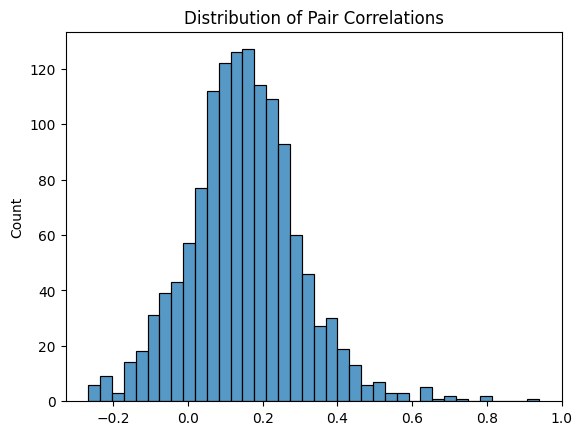

In [38]:
tri = np.triu(corr)

vals = tri[np.nonzero(tri)]
vals = vals[vals != 1]

sns.histplot(vals)
plt.title("Distribution of Pair Correlations")
plt.show()

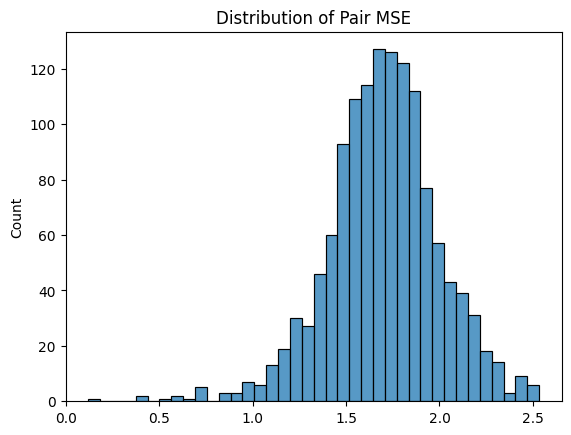

In [39]:
tri = np.triu(mse_matrix)

vals = tri[np.nonzero(tri)]
vals = vals[vals != 1]

sns.histplot(vals)
plt.title("Distribution of Pair MSE")
plt.show()

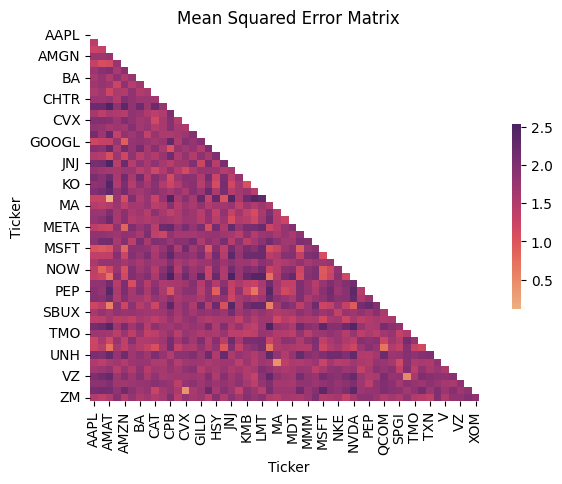

In [40]:
mask = np.triu(np.ones_like(mse_matrix, dtype=bool))

sns.heatmap(mse_matrix, mask=mask, cmap='flare', cbar_kws={"shrink": .5})
plt.title("Mean Squared Error Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

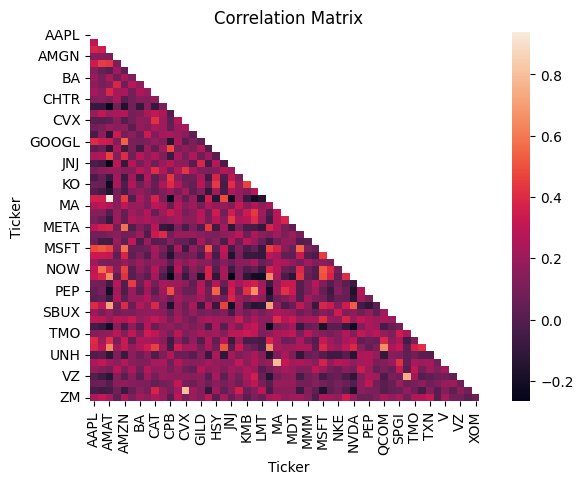

In [41]:
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask)
plt.title("Correlation Matrix")
plt.xlabel("Ticker")
plt.ylabel("Ticker")
plt.show()

In [42]:
# Clustering
# The aggregate dataframe represents the last day of the df dataframe

aggregate = df.groupby('ticker').agg({'ret_50':'last', 'ret_100': 'last', 'ret_150': 'last'})

aggregate.head()

Price,ret_50,ret_100,ret_150
ticker,,,
AAPL,0.011153,0.215912,0.216514
ADBE,-0.098451,0.029672,-0.094243
AMAT,-0.123144,-0.046502,-0.024562
AMGN,-0.040763,0.055480,0.153955
AMZN,0.014034,-0.015384,0.064650


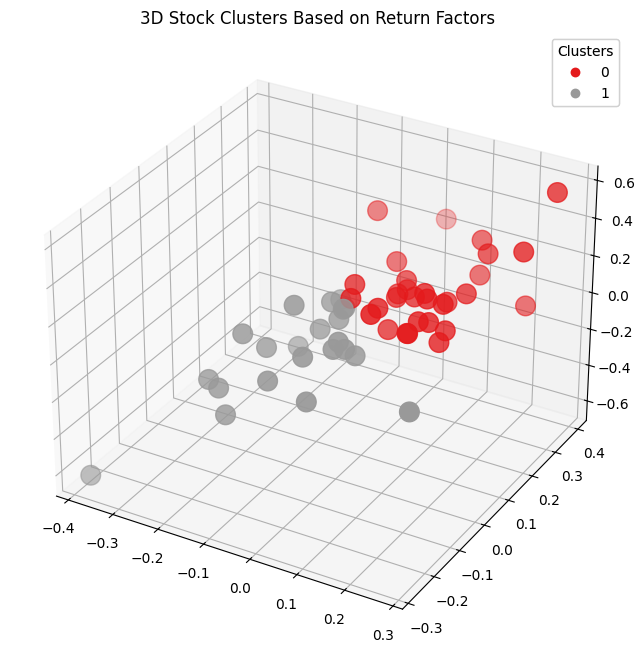

In [43]:
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
scaled_data = scaler.fit_transform(aggregate)

n_clusters = 2 # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
aggregate['Cluster'] = kmeans.fit_predict(scaled_data)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(aggregate['ret_50'], aggregate['ret_100'], aggregate['ret_150'], c=aggregate['Cluster'], s=200, cmap='Set1')

ax.set_title('3D Stock Clusters Based on Return Factors')
# ax.set_xlabel('50 Day Return')
# ax.set_ylabel('100 Day Return')
# ax.set_zlabel('150 Day Return')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()